<a href="https://colab.research.google.com/github/KHATHARSYS/Data-Science-Projects-with-Python/blob/main/Classification_model_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification model performance analysis
Hreunder we are going to assesss the performance of two kinds o classification models

*   Logistic Regression 

*   K Neirest Neghbors

Lets load the packages that we will require

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next the data 

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv")
dataset.shape
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

Predicting the Test set results

In [ ]:
y_pred_lr = classifier_lr.predict(X_test)
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

Making the Confusion Matrix for the test

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
accuracy_score(y_test, y_pred_lr)

[[65  3]
 [ 8 24]]


0.89

Visualising the Training set results

<ipython-input-14-e942e400dbb3>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


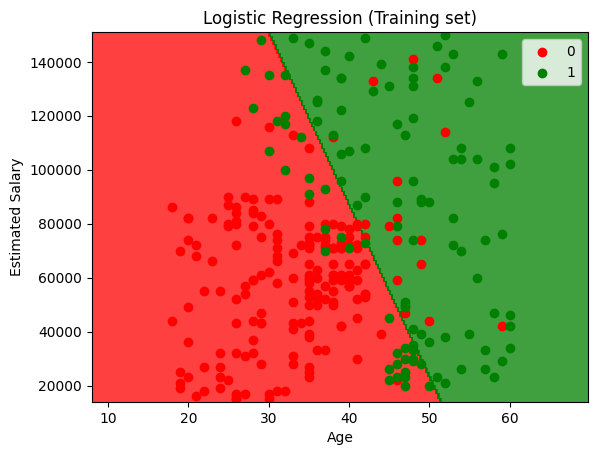

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set results

<ipython-input-15-3574e885951b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


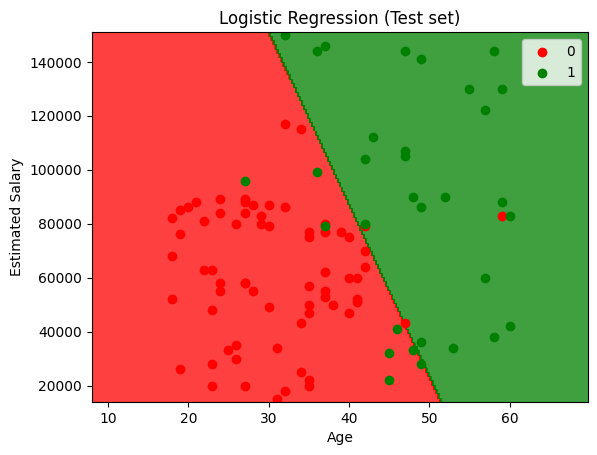

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##ROC CURVE ANALYSIS

[0.   0.75 1.  ]
[2 1 0]


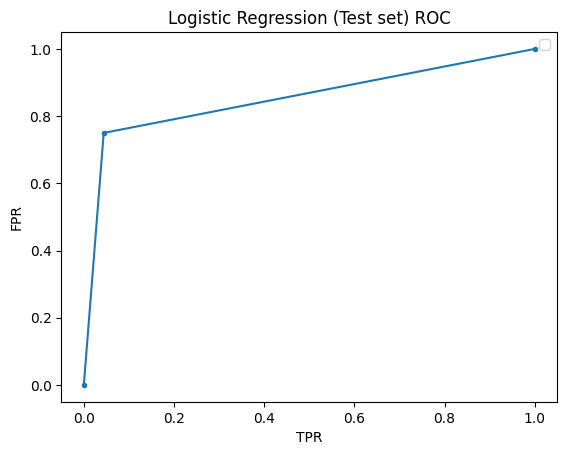

In [ ]:
from sklearn import metrics
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_pred_lr)
fpr_lr
print(tpr_lr)
print(thresholds_lr)

plt.plot(fpr_lr, tpr_lr, marker=".")
plt.title('Logistic Regression (Test set) ROC')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend()
plt.show()

##K NEIREST NEIGHBORS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

Predicting a new result of the LR model vs KNN model

In [ ]:
print(classifier_lr.predict(sc.transform([[30,87000]])), "vs",classifier_knn.predict(sc.transform([[30,87000]])))


[0] vs [0]


Predicting the Test set results

In [ ]:
y_pred_knn = classifier_knn.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

Making the Confusion Matrix for the test

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
accuracy_score(y_test, y_pred_knn)

[[64  4]
 [ 3 29]]


0.93

Visualising the Training set results

<ipython-input-21-78611759cfd8>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


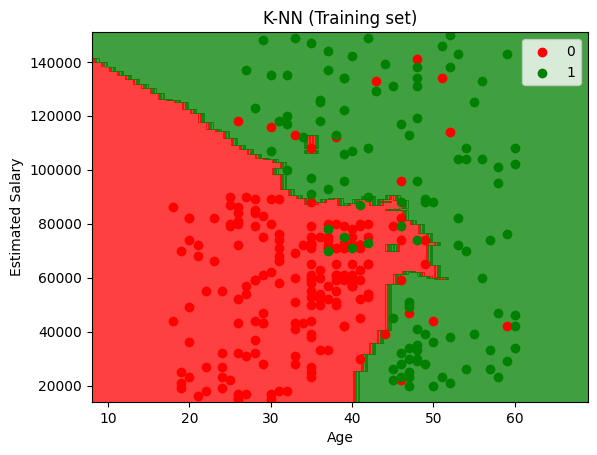

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set results

<ipython-input-22-1d06ab789014>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


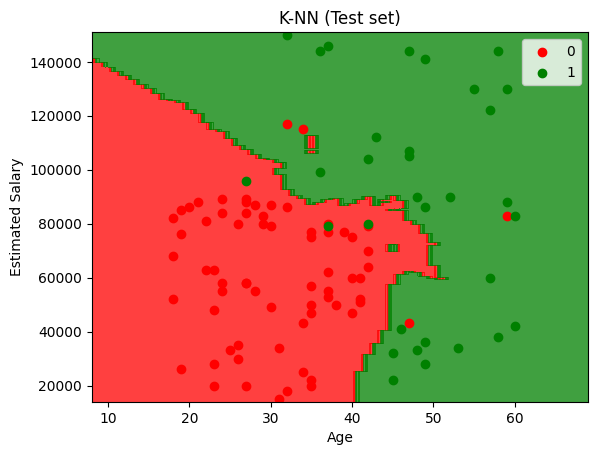

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##ROC CURVE ANALYSIS

In [ ]:
from sklearn import metrics
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_pred_knn)
fpr_knn
print(tpr_knn)
print(thresholds_knn)

[0.      0.90625 1.     ]
[2 1 0]


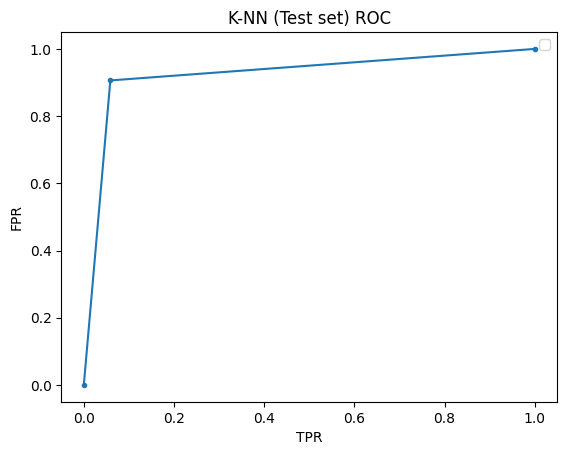

In [ ]:
plt.plot(fpr_knn, tpr_knn, marker=".")
plt.title('K-NN (Test set) ROC')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend()
plt.show()

##ROC ANALYSIS OF BOTH MODELS

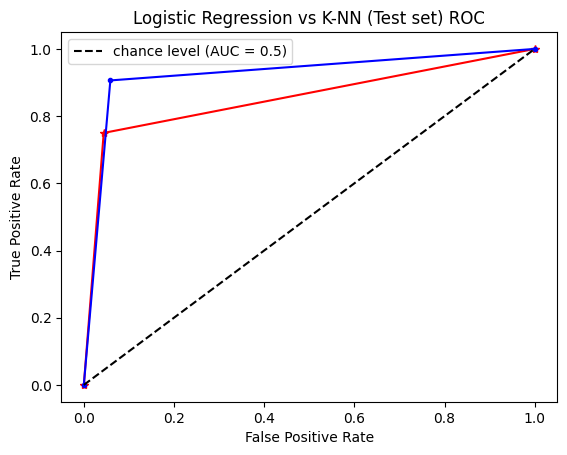

In [ ]:
plt.plot(fpr_lr, tpr_lr, marker="*", color = "red")
plt.plot(fpr_knn, tpr_knn, marker=".", color = "blue")
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.title('Logistic Regression vs K-NN (Test set) ROC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

It is easy to visualize that  the KNN model has a better performance, because the area under its curve is clearly greater.

In [ ]:
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_pred_lr)
fpr_lr
print(tpr_lr)
print(thresholds_lr)

fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_pred_knn)
fpr_knn
print(tpr_knn)
print(thresholds_knn)

roc_auc_score(y_test, y_pred_knn)
roc_auc_score(y_test, y_pred_lr)

accuracy_score(y_test, y_pred_knn)
accuracy_score(y_test, y_pred_lr)


thresholds_knn[0]

[0.   0.75 1.  ]
[2 1 0]
[0.      0.90625 1.     ]
[2 1 0]


2